In [180]:
%pwd

'/Users/r/Documents/stud/ss24/finnpinn/src'

In [181]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
dir_paths = [p for p in Path("../data_out").glob("finn_increasing_time_*") if p.is_dir()]
dir_paths

[PosixPath('../data_out/finn_increasing_time_111'),
 PosixPath('../data_out/finn_increasing_time_261'),
 PosixPath('../data_out/finn_increasing_time_36'),
 PosixPath('../data_out/finn_increasing_time_141'),
 PosixPath('../data_out/finn_increasing_time_171'),
 PosixPath('../data_out/finn_increasing_time_66'),
 PosixPath('../data_out/finn_increasing_time_231'),
 PosixPath('../data_out/finn_increasing_time_291'),
 PosixPath('../data_out/finn_increasing_time_51'),
 PosixPath('../data_out/finn_increasing_time_201'),
 PosixPath('../data_out/finn_increasing_time_6'),
 PosixPath('../data_out/finn_increasing_time_21'),
 PosixPath('../data_out/finn_increasing_time_81')]

In [183]:
df = {
    "retardation_file_paths": [],
    "num_time_steps": [],
    "num_epochs": [],
}
for p in dir_paths:
    all_ret_file_paths = sorted((p / "predicted_retardations").glob("retPred_*.npy"), key=lambda x: int(x.stem.split("_")[-1]))
    if not all_ret_file_paths:
        continue
    df["retardation_file_paths"].append(all_ret_file_paths[-1])
    df["num_time_steps"].append(int(p.name.split("_")[-1]))
    df["num_epochs"].append(int(all_ret_file_paths[-1].stem.split("_")[-1]))
df = pd.DataFrame(df).sort_values("num_time_steps").reset_index(drop=True)
df = df[df["num_time_steps"] < 170]
df

,retardation_file_paths,num_time_steps,num_epochs
0,../data_out/finn_increasing_time_6/predicted_r...,6,100
1,../data_out/finn_increasing_time_21/predicted_...,21,100
2,../data_out/finn_increasing_time_36/predicted_...,36,100
3,../data_out/finn_increasing_time_51/predicted_...,51,100
4,../data_out/finn_increasing_time_66/predicted_...,66,100
5,../data_out/finn_increasing_time_81/predicted_...,81,100
6,../data_out/finn_increasing_time_111/predicted...,111,46
7,../data_out/finn_increasing_time_141/predicted...,141,100


In [184]:
df2 = df.copy()
df2["ret"] = df["retardation_file_paths"].apply(lambda p: np.load(p).ravel())
df2 = df2.explode('ret').reset_index(drop=True)
df2["u"] = np.tile(np.arange(0, 100), len(df))
df2

,retardation_file_paths,num_time_steps,num_epochs,ret,u
0,../data_out/finn_increasing_time_6/predicted_r...,6,100,4.283369,0
1,../data_out/finn_increasing_time_6/predicted_r...,6,100,4.261923,1
2,../data_out/finn_increasing_time_6/predicted_r...,6,100,4.24041,2
3,../data_out/finn_increasing_time_6/predicted_r...,6,100,4.218837,3
4,../data_out/finn_increasing_time_6/predicted_r...,6,100,4.197204,4
...,...,...,...,...,...
795,../data_out/finn_increasing_time_141/predicted...,141,100,3.296222,95
796,../data_out/finn_increasing_time_141/predicted...,141,100,3.295753,96
797,../data_out/finn_increasing_time_141/predicted...,141,100,3.2953,97
798,../data_out/finn_increasing_time_141/predicted...,141,100,3.294862,98


In [185]:
df2.dtypes

retardation_file_paths    object
num_time_steps             int64
num_epochs                 int64
ret                       object
u                          int64
dtype: object

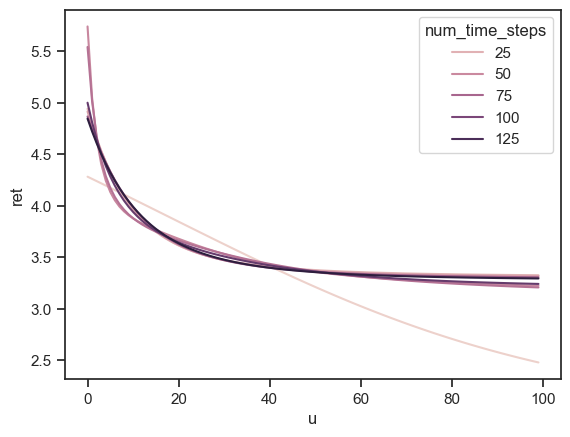

In [186]:
import seaborn as sns
# sns.set_theme(style="ticks")

# dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
# palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.lineplot(
    data=df2,
    x="u",
    y="ret",
    hue="num_time_steps",
    # style="num_time_steps",
    # kind="line",
    # palette=palette,
    # height=5, aspect=.75, facet_kws=dict(sharex=False),
)
plt.show()

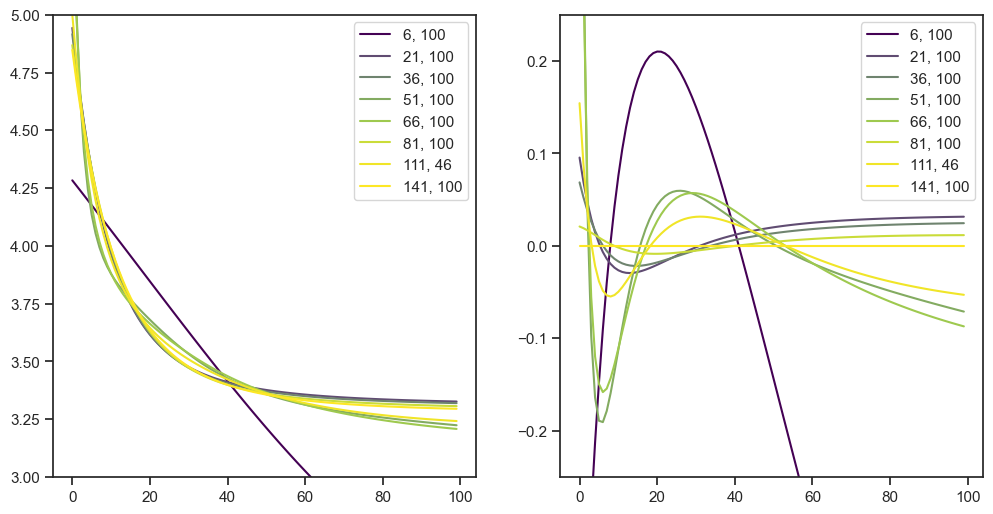

In [187]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

ret_freundlich = np.load("../data_out/retardation_freundlich.npy")

initial_colors = plt.cm.viridis(np.linspace(0, 1, len(df)))
final_color = initial_colors[-1]

highest_time_step_ret = np.load(df["retardation_file_paths"].iloc[-1])

for i, p in enumerate(df["retardation_file_paths"]):
    ret = np.load(p)
    mixed_color = initial_colors[i] * (1 - i / (len(df) - 1)) + final_color * (i / (len(df) - 1))
    ax1.plot(ret, label=f"{df['num_time_steps'][i]}, {df['num_epochs'][i]}", color=mixed_color)
    ax2.plot(ret-highest_time_step_ret, label=f"{df['num_time_steps'][i]}, {df['num_epochs'][i]}", color=mixed_color)
# ax1.plot(ret_freundlich, "r-", label="freundlich", color=final_color)
ax1.set_ylim(3,5)
ax2.set_ylim(-.25,.25)
ax1.legend()
ax2.legend()
plt.show()

/Users/r/Documents/stud/ss24/finnpinn/data_out


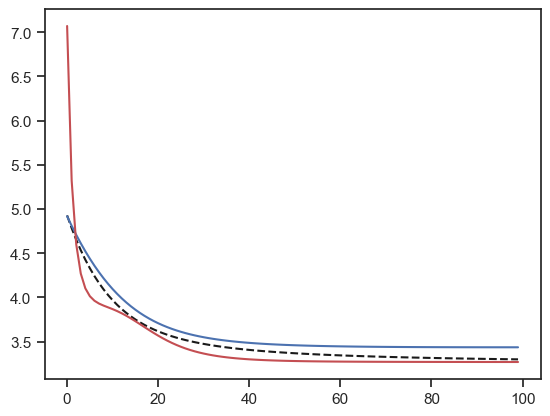

In [188]:
fig, ax = plt.subplots()

base_path = Path("../data_out/").resolve()
print(base_path)
ret_mean = np.load(base_path / "predicted_retardations/retPred_100.npy")
ret_pos = np.load(base_path / "finn_pos/predicted_retardations/retPred_100.npy")
ret_neg = np.load(base_path / "finn_neg/predicted_retardations/retPred_100.npy")
ax.plot(ret_mean, "k--")
ax.plot(ret_pos+0.1, "b")
ax.plot(ret_neg-0.1, "r")
plt.show()